<a href="https://colab.research.google.com/github/NidhiSrikanth/Class-75/blob/main/class117.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
data_to_load= files.upload()

Saving data.csv to data.csv


In [2]:
import pandas as pd

df= pd.read_csv("data.csv")
print(df.head())

   age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1

[5 rows x 14 columns]


In [3]:
from sklearn.model_selection import train_test_split
age= df["age"]
heart_attack= df["target"]
age_train, age_test, heart_attack_train, heart_attack_test= train_test_split(age, heart_attack, test_size= 0.25, random_state= 0)

In [8]:
from sklearn.linear_model import LogisticRegression
import numpy as np

X= np.reshape(age_train.ravel(), (len(age_train),1))
Y= np.reshape(heart_attack_train.ravel(), (len(heart_attack_train),1))
classifier= LogisticRegression(random_state=0)
classifier.fit(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
X_test= np.reshape(age_test.ravel(), (len(age_test),1))
Y_test= np.reshape(heart_attack_test.ravel(), (len(heart_attack_test),1))
heart_attack_prediction= classifier.predict(X_test)
predicted_values= []
for i in heart_attack_prediction:
  if i==0 :
    predicted_values.append("no")
  else:
    predicted_values.append("yes")

actual_values= []
for i in Y_test.ravel():
  if i==0:
    actual_values.append("no")
  else:
    actual_values.append("yes")



Text(0.5, 1.0, 'confusion matrix')

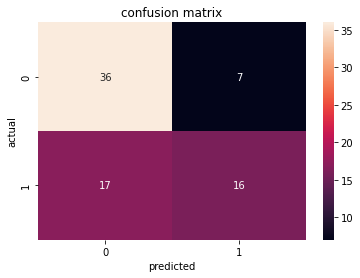

In [15]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

labels= ["yes", "no"]
cm= confusion_matrix(actual_values, predicted_values, labels)
ax= plt.subplot()
sns.heatmap(cm, ax= ax, annot= True)
ax.set_xlabel("predicted")
ax.set_ylabel("actual")
ax.set_title("confusion matrix")

True Positives + True Negatives / True Positives + True Negatives + False Positives + False Negatives
True Positive= 36, True Negative= 16, False Positive= 7, False Negative= 17

accuracy= 36 + 16 / 36 + 16 + 17 + 7
accuracy= 52/ 76
accuracy= 0.6842

In [16]:
factors= df[["age", "sex", "cp", "chol", "thalach"]]
heart_attack= df["target"]
factors_train, factors_test, heart_attack_train, heart_attack_test= train_test_split(factors, heart_attack, test_size= 0.25, random_state= 0)


In [17]:
from sklearn.preprocessing import StandardScaler

sc_x= StandardScaler()
factors_train= sc_x.fit_transform(factors_train)
factors_test= sc_x.fit_transform(factors_test)


In [22]:
classifier2= LogisticRegression(random_state=0)
classifier2.fit(factors_train,heart_attack_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
heart_attack_prediction1= classifier2.predict(factors_test)
predicted_values1= []
for i in heart_attack_prediction1:
  if i==0 :
    predicted_values1.append("no")
  else:
    predicted_values1.append("yes")

actual_values1= []
for i in heart_attack_test.ravel():
  if i==0:
    actual_values1.append("no")
  else:
    actual_values1.append("yes")



Text(0.5, 1.0, 'confusion matrix for multiple data')

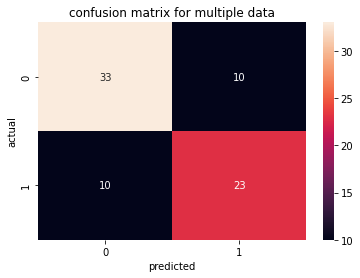

In [24]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

labels= ["yes", "no"]
cm= confusion_matrix(actual_values1, predicted_values1, labels)
ax= plt.subplot()
sns.heatmap(cm, ax= ax, annot= True)
ax.set_xlabel("predicted")
ax.set_ylabel("actual")
ax.set_title("confusion matrix for multiple data")

True Positives + True Negatives / True Positives + True Negatives + False Positives + False Negatives
True Positive= 33, True Negative= 23, False Positive= 10, False Negative= 10

accuracy= 33 + 23 / 33 + 23 + 10 + 10
accuracy= 56/ 76
accuracy= 0.7368